<hr style="border: 10px solid green;" />

## <span style="color:green">Финальный комментарий<span>
Спасибо за проделанную работу🤝

Максим, спасибо за доработки, всё принято👌 Желаю дальнейших успехов🖐

Поздравляю, проект принят👍

<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Максим, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на _ТЫ_ . Если это неприемлемо, обязательно напиши мне в комментариях - мы перейдем на _ВЫ_ .

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
    Безупречная работа</div>       
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить. Несколько таких комментариев допустимы, но более - придется некоторые доработать. Большое кол-во мелких замечаний и помарок сказываются на общем впечатлении от работы.</div>   
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать</b><br>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.</div>
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге - основные цели в диалоге:
- обмен опытом (да я тоже учусь у студентов👨‍🎓)
- выполнить проект еще лучше
- помочь тебе стать аналитиком

Поэтому чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их. 
    
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Например, вот так.</div>
   
Поехали! :)

<hr style="border: 2px solid green;" />

# <a id="0.1"></a>Содержание (кликабельное):
0. [Описание проекта](#0), [описание данных](#data), [импорт библиотек](#import)
1. [Шаг №1. Загрузка данных и их подготовка к анализу](#1)
    * [1.1 Загрузка данных](#1.1)
    * [1.2 Проверка дубликатов](#1.2)
    * [1.3 Проверка данных по категории "Посадочные места = 0"](#1.3)
    * [1.4 Итоги предобработки данных](#1.4)

2. [Шаг №2. Анализ данных](#2)
    * [2.1 Соотношение видов объектов общественного питания по их количеству](#2.1)
    * [2.2 Соотношение сетевых и несетевых заведений по количеству](#2.2)
    * [2.3 Типы объектов общественного питания характерные для сетевой и несетевой структуры](#2.3)
    * [2.4 Характерные особенности сетевых предприятий](#2.4)
    * [2.5 Среднее количество посадочных мест для каждого типа объекта общественного питания](#2.5)
    * [2.6 Информация об улицах местонахождения объектов](#2.6)
    * [2.7 Улицы с одним объектом общественного питания](#2.7)
    * [2.8 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#2.8)
3. [Шаг №3. Подготовка презентации](#3)

# <a id="0"></a>Описание проекта
[к содержанию](#0.1)

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

# <a id="data"></a>Описание данных
[к содержанию](#0.1)

Таблица rest_data:
- **id** — идентификатор объекта;
- **object_name** — название объекта общественного питания;
- **chain** — сетевой ресторан;
- **object_type** — тип объекта общественного питания;
- **address** — адрес;
- **number** — количество посадочных мест.

# <a id="import"></a>Импорт библиотек
[к содержанию](#0.1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import requests
import plotly.graph_objects as go
import scipy.stats as stats
from scipy import stats as st
from pandas.io.json import json_normalize
from pprint import pprint
import json


import math
import numpy as np

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <a id="1"></a>Шаг №1. Загрузка данных и их подготовка к анализу
[к содержанию](#0.1)

In [2]:
#снимаем ограничения на ширину колонок
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

## <a id="1.1"></a>**1.1 Загрузка данных**

[к содержанию](#0.1) 

In [3]:
df = pd.read_csv('/datasets/rest_data.csv')
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В базе 15366 записей, пропущенных значений нет, типы данных соответсвуют столбцам - два столбца целочисленные записи, остальное строки.

In [5]:
df.columns          # проверим на лишние пропуски названия колонок

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

In [6]:
df.describe()  # описание числовых данных

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


В колонке значений "количество мест" есть нулевые записи (не пропуски), и аномально большие выбросы.

In [7]:
df.object_type.unique()  # типы заведений в базе

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [8]:
df.chain.unique()   # значения принадлежности к сетевой структуре

array(['нет', 'да'], dtype=object)

## <a id="1.2"></a>**1.2 Проверка дубликатов**

[к содержанию](#0.1)

In [9]:
df.duplicated().sum()

0

В общем дубликатов нет, но в поиске дубликатов может мешать id заведения. Проверим дубликаты по адресам.

In [10]:
df.duplicated(['address']).sum()  # дубликаты по адресам

6258

Возможно на одном адресе могут быть несколько заведений, проверим по названиям.

In [11]:
np.unique(df[['chain', 'object_type']].values)  #проверка уникальных типов объектов

array(['бар', 'буфет', 'да', 'закусочная', 'кафе', 'кафетерий',
       'магазин (отдел кулинарии)', 'нет',
       'предприятие быстрого обслуживания', 'ресторан', 'столовая'],
      dtype=object)

In [12]:
# Приведем к нижнему регистру
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()
df['address'] = df['address'].str.lower()
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [13]:
# Уберем запятые, ковычки и прочие символы из названий объектов и адресов
symbols = [',', '«', '»', '(', ')', '"', '  ']
for s in symbols:
    df['object_name'] = df['object_name'].str.replace(s, '')
    df['address'] = df['address'].str.replace(s, '')
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,город москва улица егора абакумова дом 9,48
1,77874,родник,нет,кафе,город москва улица талалихина дом 2/1 корпус 1,35
2,24309,кафе академия,нет,кафе,город москва абельмановская улица дом 6,95
3,21894,пиццетория,да,кафе,город москва абрамцевская улица дом 1,40
4,119365,кафе вишневая метель,нет,кафе,город москва абрамцевская улица дом 9 корпус 1,50


In [14]:
df['chain'] = df['chain'].map({'нет':'несетевое','да':'сетевое'})
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')
df['address'] = df['address'].str.replace('ё','е')
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



,id,object_name,chain,object_type,address,number
0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48
1,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35
2,24309,кафе академия,несетевое,кафе,город москва абельмановская улица дом 6,95
3,21894,пиццетория,сетевое,кафе,город москва абрамцевская улица дом 1,40
4,119365,кафе вишневая метель,несетевое,кафе,город москва абрамцевская улица дом 9 корпус 1,50


In [15]:
df.duplicated(['address', 'object_name']).sum() # дубликаты по адресам и названиям

227

Для каждого заведения может быть разные виды обслуживания object_type

In [16]:
df.duplicated(['address', 'object_type', 'object_name']).sum()

185

В принципе тоже допустимо - осталось ограничить количеством посадочных мест, маловероятно что такие дубликаты это совпадение. Сначала проверим дубликаты без учета посадочных мест.

In [17]:
df[df.duplicated(['address', 'object_type', 'object_name'])]

,id,object_name,chain,object_type,address,number
115,28614,комбинат питания мгту им.н.э.баумана,несетевое,буфет,город москва бригадирский переулок дом 3-5,12
580,149205,общественное питание,несетевое,кафе,город москва павелецкая площадь дом 1,35
581,149131,общественное питание,несетевое,кафе,город москва павелецкая площадь дом 1,39
1409,151267,альфорно,несетевое,кафе,город москва город зеленоград корпус 438,45
2375,28604,комбинат питания мгту им.н.э.баумана,несетевое,столовая,город москва 2-я бауманская улица дом 5 строение 1,150
...,...,...,...,...,...,...
15173,218542,кофе с собой,сетевое,фаст-фуд,город москва алтуфьевское шоссе дом 70 корпус 1,0
15216,214468,макдоналдс,сетевое,фаст-фуд,город москва варшавское шоссе дом 87б,0
15217,214146,макдоналдс,сетевое,фаст-фуд,город москва кировоградская улица дом 13а,0
15363,209186,шоколадница,сетевое,кафе,город москва улица земляной вал дом 33,20


Есть вариант что данные по посадочным местах могли заносится неточно, или в зависимости от сезонности, или других факторов количество мест на самом деле меняется. Проверим данные по нескольким названиям.

In [18]:
df[df['object_name'] == 'общественное питание']

,id,object_name,chain,object_type,address,number
576,149218,общественное питание,несетевое,кафе,город москва павелецкая площадь дом 1,40
579,149227,общественное питание,несетевое,столовая,город москва павелецкая площадь дом 1,70
580,149205,общественное питание,несетевое,кафе,город москва павелецкая площадь дом 1,35
581,149131,общественное питание,несетевое,кафе,город москва павелецкая площадь дом 1,39
8071,149389,общественное питание,несетевое,кафе,город москва павелецкая площадь владение 1 сооружение 1,15


In [19]:
df[df['object_name'] == 'шоколадница']

,id,object_name,chain,object_type,address,number
45,21723,шоколадница,сетевое,кафе,город москва улица арбат дом 29,40
72,21830,шоколадница,сетевое,кафе,город москва бауманская улица дом 33/2 строение 1,48
136,25608,шоколадница,сетевое,кафе,город москва бутырская улица дом 7,25
231,76765,шоколадница,сетевое,кафе,город москва кудринская площадь дом 1,50
247,25654,шоколадница,сетевое,кафе,город москва большая никитская улица дом 24/1 строение 1,50
...,...,...,...,...,...,...
15361,208537,шоколадница,сетевое,кафе,город москва 3-й крутицкий переулок дом 18,50
15362,209264,шоколадница,сетевое,кафе,город москва улица земляной вал дом 33,10
15363,209186,шоколадница,сетевое,кафе,город москва улица земляной вал дом 33,20
15364,221900,шоколадница,сетевое,кафе,город москва поселение московский киевское шоссе 22-й километр домовладение 4 строение 1,36


Два варианта общепита, "дубликаты" с разным количеством мест находятся на территориях рядом с вокзалами - Павелецким и Курским. Там вполне возможно расположение по одному адресу разных точек одной сети (как Шоколадница) с разным количеством мест. Что касается "Общественного питания" - это общее название для мелких ИП (вероятно), возможно это одно и тоже место (где разница в 1 стул - 39 и 40), а возможно нет. Может быть "Вареничная" и, на другом конце дома, "Блинная".

В любом случае для общего количества данных одна или две лишнии записи не будут иметь особого значения. **Оставляем более жесткое ограничениие на дубликаты, добавим в фильтр количество мест**. Можно было удалять дубликаты не учитывая количество мест и оставлять одно заведение (первое или последнее значение, через аргумент - keep=), но по вышеописанной логике это неправильно.

In [20]:
df[df['object_name'] == 'старый баку']   # пример дубликата

,id,object_name,chain,object_type,address,number
9750,169761,старый баку,несетевое,ресторан,город москва грайвороновская улица дом 12 корпус 1,92
14577,222885,старый баку,несетевое,кафе,город москва кировоградская улица владение 15а,120
14578,222932,старый баку,несетевое,кафе,город москва кировоградская улица владение 15а,120


In [21]:
# целевые фильтры для отбора дубликатов - название, адрес, количество посадочных мест.
df.duplicated(['address', 'object_name', 'number']).sum()

93

In [22]:
df.drop_duplicates(['address', 'object_name', 'number'], inplace=True)
df.duplicated(['address', 'object_name', 'number']).sum()

0

In [23]:
df[df['object_name'] == 'старый баку']    # проверка

,id,object_name,chain,object_type,address,number
9750,169761,старый баку,несетевое,ресторан,город москва грайвороновская улица дом 12 корпус 1,92
14577,222885,старый баку,несетевое,кафе,город москва кировоградская улица владение 15а,120


Дубликаты удалены

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Отличный анализ неявных дубликатов! Согласен с выбранной стратегией!</div> <br>

## <a id="1.3"></a>**1.3 Проверка данных по категории "Посадочные места = 0"**

[к содержанию](#0.1)

In [24]:
number_null = df['number'] == 0   #нет посадочных мест
df[number_null]

,id,object_name,chain,object_type,address,number
137,115498,пекарня & донер,несетевое,закусочная,город москва бутырская улица дом 9 корпус 2,0
154,152556,шаурма в пите,несетевое,фаст-фуд,город москва варшавское шоссе дом 72 корпус 2,0
157,149568,суши,несетевое,фаст-фуд,город москва улица маршала василевского дом 3 корпус 1,0
190,126956,шаурма куры-гриль,несетевое,фаст-фуд,город москва 1-я владимирская улица дом 21,0
195,149531,шаурма куры-гриль,несетевое,фаст-фуд,город москва 2-я владимирская улица дом 44/10,0
...,...,...,...,...,...,...
15334,211228,милти,сетевое,кулинария,город москва дубравная улица дом 34/29,0
15335,211221,милти,сетевое,кулинария,город москва пятницкое шоссе дом 3,0
15336,211209,готовые блюда милти,сетевое,фаст-фуд,город москва ореховый бульвар дом 22а,0
15337,208477,милти,сетевое,фаст-фуд,город москва 3-й крутицкий переулок дом 18,0


В части предприятий такая ситуация вполне допустима, в этих вариантах точно - "закусочная", "фаст-фуд" и "кулинария".

In [25]:
df.object_type.unique()  # все виды предприятий в базе

array(['кафе', 'столовая', 'закусочная', 'фаст-фуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

In [26]:
print('Всего доля записей с нулевым количеством мест: {:.2%}'.format(len(df[number_null]) / len(df)))

Всего доля записей с нулевым количеством мест: 10.38%


Исключим из отбора варианты, по которым мы установили допустимость отсутствия посадочных мест.

In [27]:
# категории для фильтрации
object_type_null = ['фаст-фуд', 'закусочная', 'кулинария']

# данные по нулевым посадлочным местам после фильтрации
df.loc[(number_null) & (~df['object_type'].isin(object_type_null))]

,id,object_name,chain,object_type,address,number
206,150836,гбоу школа №1468,несетевое,столовая,город москва волгоградский проспект дом 17 строение 1,0
504,157035,кофе с собой,сетевое,кафетерий,город москва краснохолмская набережная дом 13 строение 1,0
577,149220,кофейня кофе хаус,сетевое,кафе,город москва павелецкая площадь дом 1а строение 1,0
802,142581,кофе энигма,несетевое,кафе,город москва овчинниковская набережная дом 22/24 строение 1,0
1003,149427,французская пекарня,несетевое,кафетерий,город москва русаковская улица дом 29,0
...,...,...,...,...,...,...
15278,211218,милти,сетевое,кафе,город москва зеленодольская улица дом 33 корпус 1 строение 2,0
15287,211416,милти,сетевое,кафе,город москва сормовская улица дом 6,0
15288,211205,милти,сетевое,кафе,город москва сокольническая площадь дом 9а,0
15290,211204,милти,сетевое,кафе,город москва улица стромынка дом 25 строение 1,0


Записей осталось 569. "Милти" считается сетевым кафе, но по сути позиционирования это приготовление еды на вынос (так во всяком случае на сайте написано). Либо это точки без мест, либо это точки расположенные на фудкортах ТЦ. Можно отбросить МИЛТИ из этих данных.

In [28]:
(
    df.loc[(number_null) 
                  & (~df['object_type'].isin(object_type_null) 
                     & (df['object_name'] != 'милти'))]
)

,id,object_name,chain,object_type,address,number
206,150836,гбоу школа №1468,несетевое,столовая,город москва волгоградский проспект дом 17 строение 1,0
504,157035,кофе с собой,сетевое,кафетерий,город москва краснохолмская набережная дом 13 строение 1,0
577,149220,кофейня кофе хаус,сетевое,кафе,город москва павелецкая площадь дом 1а строение 1,0
802,142581,кофе энигма,несетевое,кафе,город москва овчинниковская набережная дом 22/24 строение 1,0
1003,149427,французская пекарня,несетевое,кафетерий,город москва русаковская улица дом 29,0
...,...,...,...,...,...,...
15236,219130,kfc,сетевое,ресторан,город москва улица вавилова дом 3,0
15246,214867,kfc,сетевое,кафе,город москва кутузовский проспект дом 57,0
15252,222677,чайхона №1,сетевое,кафе,город москва мячковский бульвар дом 3а,0
15253,214872,чайхона №1,сетевое,кафе,город москва кутузовский проспект дом 57,0


In [29]:
df.loc[(number_null) & (df['object_name'] == 'kfc')]              # пример данных по сети KFC

,id,object_name,chain,object_type,address,number
5718,156398,kfc,сетевое,фаст-фуд,город москва святоозерская улица дом 1а,0
5973,134575,kfc,сетевое,фаст-фуд,город москва поречная улица дом 10,0
8754,154534,kfc,сетевое,ресторан,город москва хорошевское шоссе дом 27,0
12068,94597,kfc,сетевое,ресторан,город москва ходынский бульвар дом 4,0
12083,176827,kfc,сетевое,фаст-фуд,город москва семеновская площадь дом 1,0
13472,203842,kfc,сетевое,кафе,город москва ленинский проспект дом 109,0
15236,219130,kfc,сетевое,ресторан,город москва улица вавилова дом 3,0
15244,210743,kfc,сетевое,фаст-фуд,город москва город московский улица хабарова дом 2,0
15246,214867,kfc,сетевое,кафе,город москва кутузовский проспект дом 57,0


В списках с нулевым количеством мест есть сетевые предприятия, при ближайшем рассмотрении по адресу расположения, эти точки находятся с торговых центрах. Т.е вероятно это фудкорты где нет четко выделенных зон с количеством мест для каждого сетевого предприятия. Можем также убрать такие предприятия из фильтрации нулевых мест.

In [30]:
# не сетевые предприятия
chain_no = df['chain'] == 'несетевое' 
df.loc[(number_null) & (~df['object_type'].isin(object_type_null)) & (chain_no)]

,id,object_name,chain,object_type,address,number
206,150836,гбоу школа №1468,несетевое,столовая,город москва волгоградский проспект дом 17 строение 1,0
802,142581,кофе энигма,несетевое,кафе,город москва овчинниковская набережная дом 22/24 строение 1,0
1003,149427,французская пекарня,несетевое,кафетерий,город москва русаковская улица дом 29,0
1018,21413,интермедсервис,несетевое,буфет,город москва садовая-каретная улица дом 20 строение 2,0
1229,155493,шаурма24,несетевое,кафетерий,город москва флотская улица дом 36,0
...,...,...,...,...,...,...
14959,219124,калимера,несетевое,кафе,город москва хорошевское шоссе дом 27,0
14967,210764,дейли шеф,несетевое,ресторан,город москва город московский улица хабарова дом 2,0
14970,214114,армянский лаваш,несетевое,кафе,город москва поселение воскресенское поселок воскресенское дом 40 корпус 2,0
14978,213725,выпечка,несетевое,кафе,город москва поселение воскресенское деревня ямонтово владение 71,0


Определим не сетевые точки общепита расположенные в торговых центрах по дубликатам адресов расположения.

In [31]:
rest_number_null = (
                    df.loc[(number_null) 
                        & (~df['object_type'].isin(object_type_null)) & (chain_no)]
)
# заведения НЕ сетевые расположенные в торговых центрах, 
# т.е вероятно не имеющие конкретного количество посадочных мест
rest_number_null[rest_number_null.duplicated('address')]

,id,object_name,chain,object_type,address,number
4491,152299,фудмаркет. грачева,несетевое,ресторан,город москва улица новый арбат дом 21,0
4492,152305,фудмаркет. шапиро,несетевое,ресторан,город москва улица новый арбат дом 21,0
4493,152307,фудмаркет. салпагарова,несетевое,ресторан,город москва улица новый арбат дом 21,0
4501,152255,фудмаркет.швыдкой,несетевое,ресторан,город москва улица новый арбат дом 21,0
4502,152222,фудмаркет.паритова,несетевое,ресторан,город москва улица новый арбат дом 21,0
...,...,...,...,...,...,...
14944,222551,krispy kreme,несетевое,кафе,город москва ходынский бульвар дом 4,0
14952,222448,kuvings,несетевое,бар,город москва хорошевское шоссе дом 27,0
14956,219102,salateria,несетевое,кафе,город москва хорошевское шоссе дом 27,0
14957,219103,вьетпапа,несетевое,кафе,город москва хорошевское шоссе дом 27,0


Почти половина из несетевых предприятий с нулевыми местами расположена по адресам ТЦ (фудкортов, фудмаркетов). Проверим количество предприятий общепита не относящихся к сетевым структурам и расположенные не в ТЦ и т.п.

In [32]:
# заведения расположенные НЕ по массовым адресам
rest_number_null[~rest_number_null.duplicated('address')]

,id,object_name,chain,object_type,address,number
206,150836,гбоу школа №1468,несетевое,столовая,город москва волгоградский проспект дом 17 строение 1,0
802,142581,кофе энигма,несетевое,кафе,город москва овчинниковская набережная дом 22/24 строение 1,0
1003,149427,французская пекарня,несетевое,кафетерий,город москва русаковская улица дом 29,0
1018,21413,интермедсервис,несетевое,буфет,город москва садовая-каретная улица дом 20 строение 2,0
1229,155493,шаурма24,несетевое,кафетерий,город москва флотская улица дом 36,0
...,...,...,...,...,...,...
14951,222442,onepricecoffe,несетевое,кафетерий,город москва хорошевское шоссе дом 27,0
14967,210764,дейли шеф,несетевое,ресторан,город москва город московский улица хабарова дом 2,0
14970,214114,армянский лаваш,несетевое,кафе,город москва поселение воскресенское поселок воскресенское дом 40 корпус 2,0
14978,213725,выпечка,несетевое,кафе,город москва поселение воскресенское деревня ямонтово владение 71,0


In [33]:
print('Доля записей с нулевым количеством мест для заведений с немассовым адресом: {:.2%}'.format(
                len(rest_number_null[~rest_number_null.duplicated('address')]) / len(df)))

Доля записей с нулевым количеством мест для заведений с немассовым адресом: 1.79%


Процент данных с неопределенным количеством посадочных мест достаточно низкий, вряд ли такой процент неопределенности как то существенно повлияет на окончательные выводы. Проверим возможно ли каким то образом заполнить отсутствующую информацию по некоторым предприятиям где явно должны быть посадочные места.

In [34]:
df[df['object_name'] == 'гбоу школа №1468']

,id,object_name,chain,object_type,address,number
206,150836,гбоу школа №1468,несетевое,столовая,город москва волгоградский проспект дом 17 строение 1,0
4737,150838,гбоу школа №1468,несетевое,столовая,город москва рабочая улица дом 10,0
4739,150833,гбоу школа №1468,несетевое,столовая,город москва рабочая улица дом 35 корпус 2,0
4740,150835,гбоу школа №1468,несетевое,столовая,город москва вековая улица дом 10,0
4750,150834,гбоу школа №1468,несетевое,столовая,город москва волгоградский проспект дом 11 корпус 2,0
8228,150837,гбоу школа №1468,несетевое,столовая,город москва нижегородская улица дом 19,0


In [35]:
df.loc[df['object_name'] == 'шаурма24']

,id,object_name,chain,object_type,address,number
1229,155493,шаурма24,несетевое,кафетерий,город москва флотская улица дом 36,0
11491,180962,шаурма24,несетевое,фаст-фуд,город москва нагатинская улица дом 16,0


Все данные по посадочным местам столовой гбоу школа №1468 отсутствуют, на сайте школы тоже нет. Такая же ситуаций с шаурмой24, в этом случае действительно может не быть посадочных мест.

In [36]:
df.loc[df['object_name'] == 'phobo']

,id,object_name,chain,object_type,address,number
1927,149337,phobo,несетевое,кафе,город москва улица рождественка дом 5/7 строение 2,36
10156,172769,phobo,несетевое,кафе,город москва ленинградское шоссе дом 16а строение 8,20
15024,210136,phobo,несетевое,кафе,город москва поселение московский киевское шоссе 23-й километр дом 1 строение 1,0


"phobo" - необязательно, что по последнему адресу вообще есть посадочные места, тем более что это автовокзал.

In [37]:
df.loc[df['object_name'] == 'французская пекарня']

,id,object_name,chain,object_type,address,number
225,25447,французская пекарня,несетевое,кафе,город москва воронцовская улица дом 48,25
686,128970,французская пекарня,несетевое,кафе,город москва проспект мира дом 47 строение 1,16
940,153091,французская пекарня,несетевое,кафетерий,город москва профсоюзная улица дом 13/12,12
1003,149427,французская пекарня,несетевое,кафетерий,город москва русаковская улица дом 29,0
1923,137429,французская пекарня,несетевое,кафе,город москва улица сретенка дом 27 строение 1,20
9127,160259,французская пекарня,несетевое,кафе,город москва улица миклухо-маклая дом 47а,8
10229,183336,французская пекарня,несетевое,кафе,город москва улица маршала бирюзова дом 16,10
10557,189211,французская пекарня,несетевое,кафе,город москва южнопортовая улица дом 18,8
11228,174841,французская пекарня,несетевое,кулинария,город москва улица молостовых дом 1д строение 2,2
12285,204844,французская пекарня,несетевое,кафетерий,город москва проспект андропова дом 21,20


По данным из французской пекарни можно заполнить типичное число посадочных мест из категории кафетерий - 12 мест.

In [38]:
df.loc[df['object_name'] == 'французская пекарня', 'number'] = (
df.loc[df['object_name'] == 'французская пекарня', 'number'].replace(0, 12)
)

In [39]:
df.loc[df['object_name'] == 'французская пекарня']  # проверка

,id,object_name,chain,object_type,address,number
225,25447,французская пекарня,несетевое,кафе,город москва воронцовская улица дом 48,25
686,128970,французская пекарня,несетевое,кафе,город москва проспект мира дом 47 строение 1,16
940,153091,французская пекарня,несетевое,кафетерий,город москва профсоюзная улица дом 13/12,12
1003,149427,французская пекарня,несетевое,кафетерий,город москва русаковская улица дом 29,12
1923,137429,французская пекарня,несетевое,кафе,город москва улица сретенка дом 27 строение 1,20
9127,160259,французская пекарня,несетевое,кафе,город москва улица миклухо-маклая дом 47а,8
10229,183336,французская пекарня,несетевое,кафе,город москва улица маршала бирюзова дом 16,10
10557,189211,французская пекарня,несетевое,кафе,город москва южнопортовая улица дом 18,8
11228,174841,французская пекарня,несетевое,кулинария,город москва улица молостовых дом 1д строение 2,2
12285,204844,французская пекарня,несетевое,кафетерий,город москва проспект андропова дом 21,20


Для более детального анализа нет смысла, количество неопределенных данных в этой категории = 1,8%, малая величина, слабо повлияющая на выводы.

## <a id="1.4"></a>**1.4 Итоги предобработки данных**

[к содержанию](#0.1)

- В базе 15 366 записей, пропущенных значений нет, типы данных соответсвуют столбцам - два столбца целочисленные записи, остальное текстовые данные.
- В колонке значений "количество мест" есть нулевые записи (не пропуски), и аномально большие выбросы.
- Полных дубликатов нет (из-за поля id заведения). Поиск дубликатов по параметрам: адрес, название, количество посадочных мест, т.е по наиболее полному списку возможных совпадений выявил 93 записи. Такие данные менее 1% от всего объема. Только по названиям общего порядка типа "Общественного питания" нельзя понять однозначно принадлежность к одному и тому же заведению.
- Удалили дубликаты по условиям в которые вошли все поля кроме id..

**Данные по категории "Посадочные места == 0"**

- Всего доля записей с нулевым количеством мест: 10.38%.
- По сути деятельности для некоторых заведений такая практика вполне допустима, например для "закусочных", "предприятий быстрого обслуживания" и "магазин (отдел кулинарии)".
- В остальные 569 записи входят сетевые и несетевые заведения в том числе расположенные по адресам ТЦ, фудкортов и фудмаркетов.
- По немассовым адресам (не ТЦ) доля записей с нулевым количеством мест составляет 1.79%, что достаточно салый показатель. Вряд ли такой процент неопределенности как-то существенно повлияет на окончательные выводы.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Шикарный обзор и предобработка данных👌</div> <br>

# <a id="2"></a>Шаг №2. Анализ данных
[к содержанию](#0.1)

## <a id="2.1"></a>**2.1 Соотношение видов объектов общественного питания по их количеству**

[к содержанию](#0.1)

In [40]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48
1,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35
2,24309,кафе академия,несетевое,кафе,город москва абельмановская улица дом 6,95
3,21894,пиццетория,сетевое,кафе,город москва абрамцевская улица дом 1,40
4,119365,кафе вишневая метель,несетевое,кафе,город москва абрамцевская улица дом 9 корпус 1,50


In [41]:
df['object_type'].unique()  # данные для подписи оси х на графике

array(['кафе', 'столовая', 'закусочная', 'фаст-фуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

### **График "Количество предприятий общественного питания по типу объекта"**

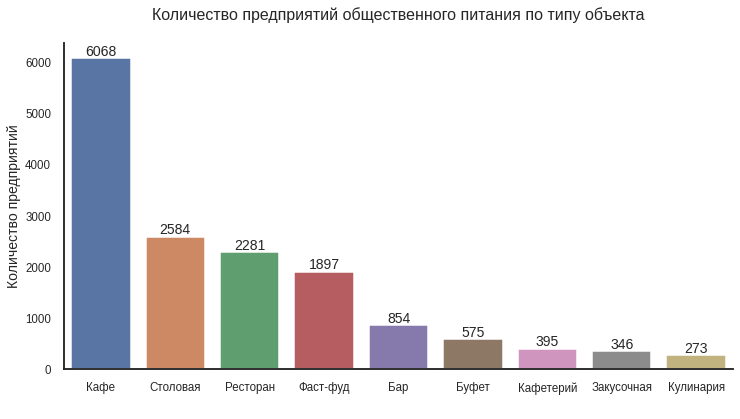

In [42]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise
plt.style.use('seaborn-white')
sns.set_context('talk', font_scale = 0.7)

plt.figure(figsize =(12, 6))
ax = sns.countplot(x='object_type', data = df,
              order = df['object_type'].value_counts().index) # cортировка по убыванию
# убираем лишние оси
sns.despine()

plt.title('Количество предприятий общественного питания по типу объекта\n', 
          fontdict={'size': 16}, loc='center')
plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel(' ', fontdict={'size': 14})

# делаем подписи под графиком
N = 9
ind = np.arange(N)

plt.xticks(ind, ('Кафе', 'Столовая', 'Ресторан', 'Фаст-фуд', 
                 'Бар', 'Буфет', 'Кафетерий', 'Закусочная', 'Кулинария'))

# текст над столбцами
for i, object_type in enumerate(df['object_type'].value_counts()):
    ax.text(i, object_type, round(object_type, 1), horizontalalignment='center', 
                                                   verticalalignment='bottom', fontsize=14)
output_dir = "C:/Users/mxmma/Desktop/presentation figures/"
mkdir_p(output_dir)

plt.savefig('{}/object_type.png'.format(output_dir), dpi=200) # сохраняем график в файл для презентации;

In [43]:
df['object_type'].value_counts()

кафе          6068
столовая      2584
ресторан      2281
фаст-фуд      1897
бар            854
буфет          575
кафетерий      395
закусочная     346
кулинария      273
Name: object_type, dtype: int64

In [44]:
df['object_type'].value_counts().sum()

15273

Больше всего в базе зарегистировано "кафе" - 6068 шт., следующая тройка наиболее массовый сегмент "столовая"(2584), "ресторан"(2281), "фаст-фуд"(1897), замыкает список, с примерно равными долями - "кафетерий"(395), "закусочная"(346), "кулинария"(273).

## <a id="2.2"></a>**2.2 Соотношение сетевых и несетевых заведений по количеству**

[к содержанию](#0.1)

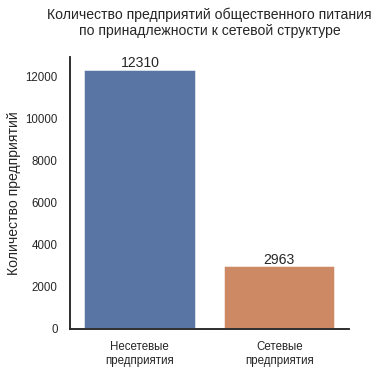

In [45]:
plt.style.use('seaborn-white')
sns.set_context('talk', font_scale = 0.7)

plt.figure(figsize =(5, 5))
ax = sns.countplot(x='chain', data = df, 
              order = df['chain'].value_counts().index)  # cортировка по убыванию
sns.despine()
plt.title('Количество предприятий общественного питания\nпо принадлежности к сетевой структуре\n', 
          fontdict={'size': 14}, loc='center')
plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('',  fontdict={'size': 14})

# делаем подписи под графиком
N = 2
ind = np.arange(N)
plt.xticks(ind, ('Несетевые\nпредприятия', 'Сетевые\nпредприятия'))

# текст над столбцами
for i, chain in enumerate(df['chain'].value_counts()):
    ax.text(i, chain, round(chain, 1), horizontalalignment='center', 
                                       verticalalignment='bottom', fontsize=14)

plt.savefig('{}/chain_type.png'.format(output_dir), dpi=200) # сохраняем график в файл для презентации;

Для презентации сохраним график Сетевых и несетевых предприятий в долях от общего объема. Совместим его с графиком количества предприятий общественного питания по типам и по принадлежности к сетевой структуре, легенду и подписи добавим в презентации.

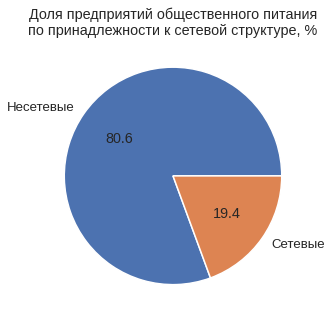

In [46]:
plt.style.use('seaborn-white')
sns.set_context('talk', font_scale = 0.8)

plt.figure(figsize =(5, 5))
labels = ['Несетевые', 'Сетевые']
plt.pie(df['chain'].value_counts(), autopct='%.1f', labels=labels)

plt.title('Доля предприятий общественного питания\nпо принадлежности к сетевой структуре, %')
plt.ylabel("")

plt.savefig('{}/chain_type_pie.png'.format(output_dir), dpi=200) # сохраняем график в файл для презентации;

In [47]:
df['chain'].value_counts()

несетевое    12310
сетевое       2963
Name: chain, dtype: int64

Сетевых предприятий 19,4% от общего объема записе в базе.

## <a id="2.3"></a>**2.3 Типы объектов общественного питания характерные для сетевой и несетевой структуры**

[к содержанию](#0.1)

Потребуется подготовить данные для подписи графиков, построенных с помощью hue

In [48]:
# данные по количеству и типам предприятий несетевого формата
df[df['chain'] == 'несетевое']['object_type'].value_counts()

кафе          4672
столовая      2581
ресторан      1738
фаст-фуд      1109
бар            817
буфет          565
кафетерий      343
закусочная     290
кулинария      195
Name: object_type, dtype: int64

In [49]:
# сформируем таблицу с данными по количеству и типам предприятий не сетевого формата
# сохраним исходную сортировку
for_sort = df[df['chain'] == 'несетевое']['object_type'].value_counts().reset_index()
for_sort.columns = ['object_type', 'chain_no'] 
for_sort

,object_type,chain_no
0,кафе,4672
1,столовая,2581
2,ресторан,1738
3,фаст-фуд,1109
4,бар,817
5,буфет,565
6,кафетерий,343
7,закусочная,290
8,кулинария,195


In [50]:
# сформируем таблицу с данными по количеству и типам предприятий сетевого формата
to_sort = df[df['chain'] == 'сетевое']['object_type'].value_counts().reset_index()
to_sort.columns =  ['object_type', 'chain_yes'] 
to_sort

,object_type,chain_yes
0,кафе,1396
1,фаст-фуд,788
2,ресторан,543
3,кулинария,78
4,закусочная,56
5,кафетерий,52
6,бар,37
7,буфет,10
8,столовая,3


In [51]:
# объединим две таблицуы с сохранением нужной нам сортировки данных
# из нее будем брать информацию для обозначений на графике значений 
for_sort = for_sort.merge(to_sort, how='left', on='object_type')
for_sort

,object_type,chain_no,chain_yes
0,кафе,4672,1396
1,столовая,2581,3
2,ресторан,1738,543
3,фаст-фуд,1109,788
4,бар,817,37
5,буфет,565,10
6,кафетерий,343,52
7,закусочная,290,56
8,кулинария,195,78


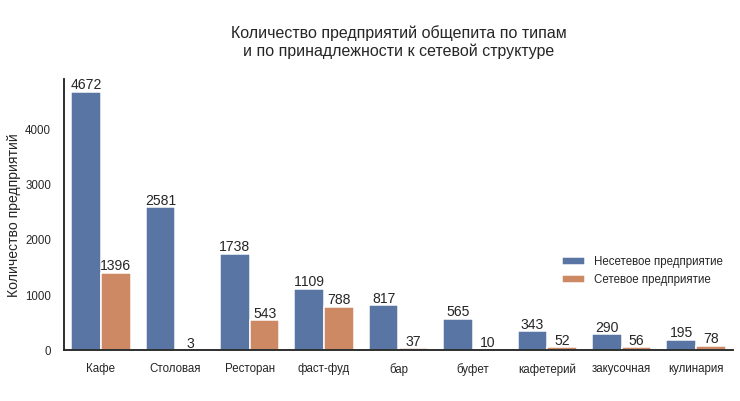

In [52]:
plt.style.use('seaborn-white')
sns.set_context('talk', font_scale = 0.7)

plt.figure(figsize =(12, 5))
ax = sns.countplot(x='object_type', data=df, hue='chain', 
                   order = df['object_type'].value_counts().index) # cортировка по убыванию
# убираем лишние оси
sns.despine()

plt.title(' \nКоличество предприятий общепита по типам\nи по принадлежности к сетевой структуре\n', 
          fontdict={'size': 16}, loc='center')
plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('  ', fontdict={'size': 14})

plt.legend(['Несетевое предприятие', 'Сетевое предприятие'], 
                                       loc='lower right', bbox_to_anchor=(1., 0.2, 0, 0))

# текст над столбцами
for i, object_type in enumerate(df[df['chain'] == 'несетевое']['object_type'].value_counts()):
    ax.text(i-0.20, object_type, round(object_type, 1), horizontalalignment='center', 
                                                   verticalalignment='bottom', fontsize=14)

for i, chain_yes in enumerate(for_sort['chain_yes']):
    ax.text(i+0.20, chain_yes, round(chain_yes, 1), horizontalalignment='center', 
                                                   verticalalignment='bottom', fontsize=14)
# делаем подписи под графиком
N = 9
ind = np.arange(N)
plt.xticks(ind, ('Кафе', 'Столовая', 'Ресторан', 'фаст-фуд', 
                 'бар', 'буфет', 'кафетерий', 'закусочная', 'кулинария'))

plt.savefig('{}/object_type_chain.png'.format(output_dir), dpi=200) # сохраняем график в файл для презентации;

**В основном сетевыми являются кафе, ресторан, предприятия быстрого питания (наименование часто используемое именно большими компаниями типа МакДоналдс, КFC и т.п.). По остальным типам предприятий единичные случаи сетевых принадлежностей.**

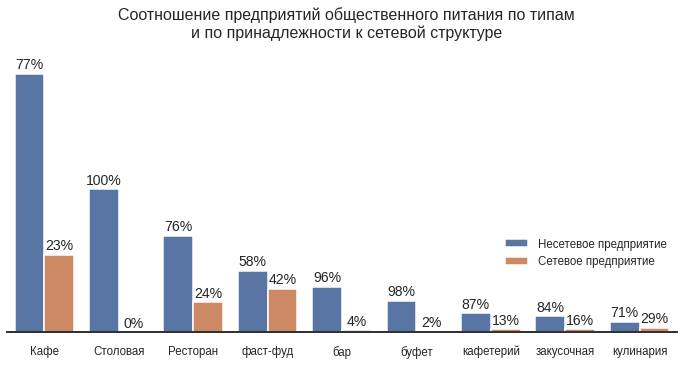

In [53]:
plt.style.use('seaborn-white')
sns.set_context('talk', font_scale = 0.7)

plt.figure(figsize =(12, 5))
ax = sns.countplot(x='object_type', data=df, hue='chain', 
                   order = df['object_type'].value_counts().index) # cортировка по убыванию
# убираем лишние оси
sns.despine(left=True)

plt.title('  Соотношение предприятий общественного питания по типам\n  и по принадлежности к сетевой структуре\n', 
          fontdict={'size': 16}, loc='center')
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

plt.legend(['Несетевое предприятие', 'Сетевое предприятие'], 
                                       loc='lower right', bbox_to_anchor=(1., 0.2, 0, 0))

# подписи в % над столбцами
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 100, '{0:.0%}'.format(height_l/total), ha="center", fontsize=14)
    ax.text(right.get_x() + right.get_width()/2., height_r + 100, '{0:.0%}'.format(height_r/total), ha="center", fontsize=14)


# делаем подписи под графиком
N = 9
ind = np.arange(N)
plt.xticks(ind, ('Кафе', 'Столовая', 'Ресторан', 'фаст-фуд', 
                 'бар', 'буфет', 'кафетерий', 'закусочная', 'кулинария'))

plt.savefig('{}/object_type_chain_pr.png'.format(output_dir), dpi=200, bbox_inches='tight'); # сохраняем график в файл для презентации

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Молодец, выбрал верную метрику оценки 😎</div> <br>

## <a id="2.4"></a>**2.4 Характерные особенности сетевых предприятий**

[к содержанию](#0.1)

Рассмотрим какое количество посадочных мест характерно для разных типов сетевых предприятий

### **График распределения сетевых предприятий общественного питания по количеству посадочных мест**

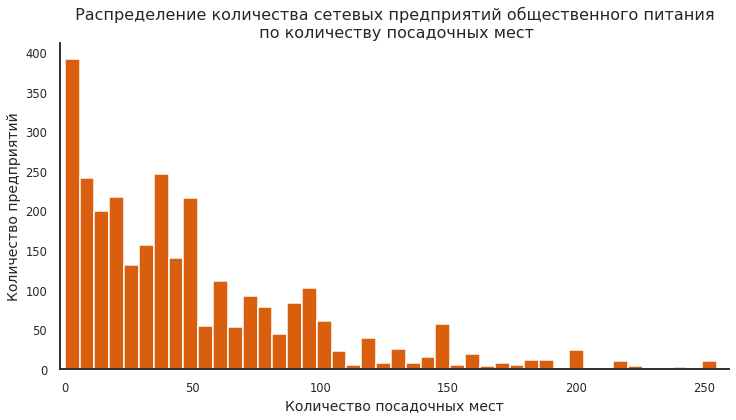

In [54]:
plt.figure(figsize=(12, 6))
plt.xlim(-2,260)
sns.set_style('white')

sns.distplot(df.query('chain == "сетевое"').number, 
             kde=False, bins=100, hist_kws = {'color':'#d95f0e', 'alpha':1.0})

plt.title(' Распределение количества сетевых предприятий общественного питания \n по количеству посадочных мест', 
          fontdict={'size': 16}, loc='center')
plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('Количество посадочных мест', fontdict={'size': 14})

sns.despine()
plt.savefig('{}/count_chain.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

Распределение ненормальное, поэтому наиболее типичное количество мест в сетевых заведениях покажет либо мода распределения, либо медиана

In [55]:
df.query('chain == "сетевое"').number.describe()

count    2963.000000
mean       52.998988
std        57.154171
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

Среднее значение (медиана) = 40

In [56]:
df.query('chain == "сетевое"').number.mode()

0    0
dtype: int64

Мода = 0 это те предприятия которые расположены на фудкортах в торговых центрах, конкуренция выше, затраты на аренду и содержания территории ниже. Судя по медиане характерное количество посадочных мест для сетевых предприятий - 40.

**Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?**

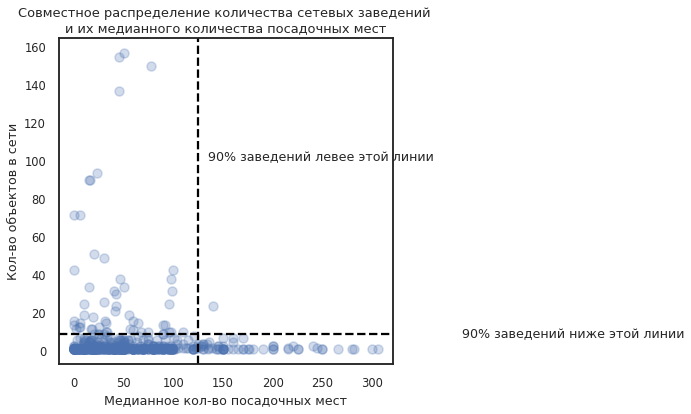

In [97]:
chain_objects = df[df['chain']=='сетевое'].groupby('object_name').agg({'object_name':'count', 'number':'median'})
chain_objects.columns = ['objects', 'median_number']
plt.figure(figsize=(6,6))
plt.scatter(chain_objects['median_number'], chain_objects['objects'], alpha=0.25)
plt.xlabel('Медианное кол-во посадочных мест')
plt.ylabel('Кол-во объектов в сети')
plt.title('Совместное распределение количества сетевых заведений \nи их медианного количества посадочных мест', fontsize=13)
plt.axhline(np.percentile(chain_objects['objects'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(chain_objects['median_number'], 90), linestyle='--', color='black')
plt.text(390,7, '90% заведений ниже этой линии')
plt.text(135,100, '90% заведений левее этой линии')
plt.show()

**Как мы видим из графика, как правило, в сетевых заведениях - мало заведений с большим количеством посадочных мест.
В 90% сетей не больше 130 посадочных мест и 6 заведений в среднем**

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Я не уверен, правильно ли я понял что нужно было сделать. Надеюсь это отвечает на вышезаданный вопрос.</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>Всё верно👍 Позволил себе добавить <code>alpha=0.25</code> в метод <code>plt.scatter</code> - так выделяется место наибольшей плотности точек</div> 

### **Рассмотрим подробнее 3 самых массовых типа предприятия в сетевом сегменте - Кафе, Ресторан, Предприятие быстрого обслуживания**

In [58]:
df.query('chain == "сетевое" & object_type == "кафе"').number.describe()

count    1396.000000
mean       47.426934
std        44.731453
min         0.000000
25%        20.000000
50%        40.000000
75%        60.000000
max       456.000000
Name: number, dtype: float64

In [59]:
# мода распределения посадочных мест в категории "кафе"
df.query('chain == "сетевое" & object_type == "кафе"').number.mode()

0    20
dtype: int64

In [60]:
df.query('chain == "сетевое" & object_type == "ресторан"').number.describe()

count    543.000000
mean     100.362799
std       74.442225
min        0.000000
25%       50.000000
50%       89.000000
75%      137.000000
max      500.000000
Name: number, dtype: float64

In [61]:
# мода распределения посадочных мест в категории "рестораны"
df.query('chain == "сетевое" & object_type == "ресторан"').number.mode()

0    50
dtype: int64

In [62]:
df.query('chain == "сетевое" & object_type == "фаст-фуд"').number.describe()

count    788.000000
mean      40.319797
std       50.738879
min        0.000000
25%        8.000000
50%       25.000000
75%       52.000000
max      580.000000
Name: number, dtype: float64

In [63]:
# мода распределения посадочных мест в категории "предприятие быстрого обслуживания"
df.query('chain == "сетевое" & object_type == "фаст-фуд"').number.mode()

0    0
dtype: int64

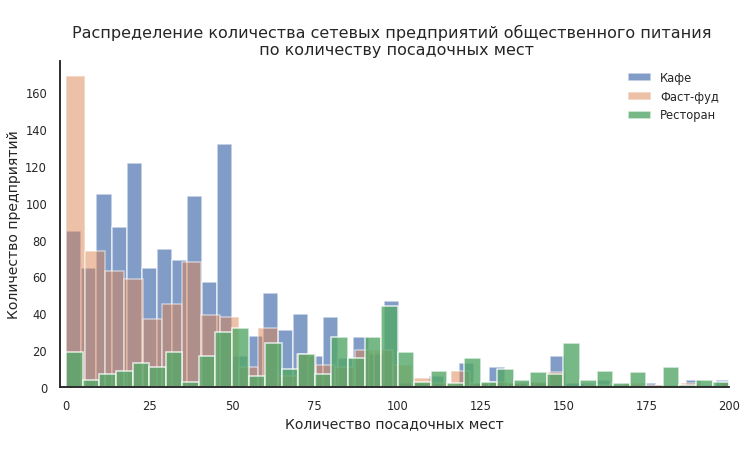

In [64]:
plt.figure(figsize=(12, 6))
plt.xlim(-2,200)
sns.set_style('white')
sns.set_context('talk', font_scale = 0.7)

sns.distplot(df.query('chain == "сетевое" & object_type == "кафе"').number, 
             kde=False, bins=100, hist_kws = {'alpha':0.7}, label='Кафе')
sns.distplot(df.query('chain == "сетевое" & object_type == "фаст-фуд"').number, 
             kde=False, bins=100, hist_kws = {'alpha':0.5}, label='Фаст-фуд')
sns.distplot(df.query('chain == "сетевое" & object_type == "ресторан"').number, 
             kde=False, bins=100, hist_kws = {'alpha':0.8}, label='Ресторан')

plt.title(' \nРаспределение количества сетевых предприятий общественного питания \n по количеству посадочных мест', 
          fontdict={'size': 16}, loc='center')
plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('Количество посадочных мест\n', fontdict={'size': 14})
plt.legend(loc='best')

sns.despine()

plt.savefig('{}/count_chain_top3.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

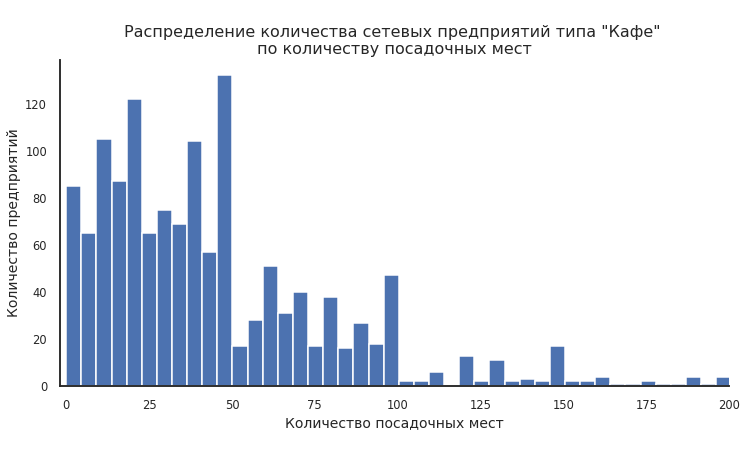

In [65]:
plt.figure(figsize=(12, 6))
plt.xlim(-2,200)
sns.set_style('white')
sns.set_context('talk', font_scale = 0.7)

sns.distplot(df.query('chain == "сетевое" & object_type == "кафе"').number, 
             kde=False, bins=100, hist_kws = {'alpha':1}, label='Кафе')

plt.title(' \nРаспределение количества сетевых предприятий типа "Кафе" \nпо количеству посадочных мест', 
          fontdict={'size': 16}, loc='center')
plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('Количество посадочных мест\n', fontdict={'size': 14})
#plt.legend(loc='best')

sns.despine()
plt.savefig('{}/count_chain_cafe.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

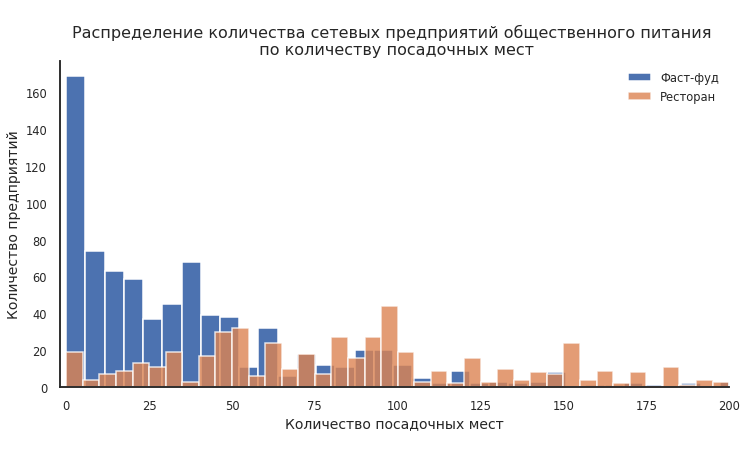

In [66]:
plt.figure(figsize=(12, 6))
plt.xlim(-2,200)
sns.set_style('white')
sns.set_context('talk', font_scale = 0.7)

sns.distplot(df.query('chain == "сетевое" & object_type == "фаст-фуд"').number, 
             kde=False, bins=100, hist_kws = {'alpha':1}, label='Фаст-фуд')
sns.distplot(df.query('chain == "сетевое" & object_type == "ресторан"').number, 
             kde=False, bins=100, hist_kws = {'alpha':0.8}, label='Ресторан')

plt.title(' \nРаспределение количества сетевых предприятий общественного питания \n по количеству посадочных мест', 
          fontdict={'size': 16}, loc='center')
plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('Количество посадочных мест\n', fontdict={'size': 14})
plt.legend(loc='best')

sns.despine()
plt.savefig('{}/count_chain_2_top3.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

- Для кафе наиболее типичным является 20-50 посадочных мест.
- "Предприятие быстрого обслуживания" в большинстве своем не имеет своих посадочных мест так как это не предусмотрено форматом заведения или они располагаются в ТЦ и т.п. местах.
- Для ресторанов характерно 50-90 посадочных мест.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать</b><br>
В разделе проделана хорошая работа, но рассмотрена одна сторона вопроса -  <b>кол-во посадочных мест</b>, а вот <b>кол-во заведений</b> не рассмотрено. Попробуй визуализировать <b>Кол-во заведений в сети vs среднее кол-во мест</b></div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Вроде сделано </div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍</div> 

## <a id="2.5"></a>**2.5 Среднее количество посадочных мест для каждого типа объекта общественного питания**

[к содержанию](#0.1)

Рассмотрим как распределено среднее количество посадочных мест по типам предприятий.

Рассчитаем значения среднего и медианы для каждого типа предприятия, выберем те значения которые более объективно, с точки зрения распределения данных отражают реальное положение дел.

In [67]:
rest_number_mean = df.groupby('object_type').agg({'number':('mean', 'median')}).reset_index()
rest_number_mean.columns = ['object_type', 'number_mean', 'number_median']
rest_number_mean

,object_type,number_mean,number_median
0,бар,43.584309,35.0
1,буфет,51.514783,32.0
2,закусочная,7.673410,0.0
3,кафе,39.793507,30.0
4,кафетерий,9.245570,6.0
5,кулинария,5.589744,0.0
6,ресторан,96.925033,80.0
7,столовая,130.337848,103.0
8,фаст-фуд,20.808645,6.0


In [68]:
# среднее значение по количеству посадочных мест в заведениях Москвы.
rest_number_mean.number_median.median()

30.0

Выберем для показа данные по расчету медианы:

- при ненормальном распределении это более достоверный вариант, позволяет не учитывать аномальные выбросы справа
- при большом количестве (10%) данных с отсутствием посадочных мест значение среднего не покажет реальную ситуацию с такой категорией как "отдел кулинарии", "закусочная"
- используя медиану мы получим более категоричную картину распределения посадочных мест.

In [69]:
# объединим две таблицу с сохранением нужной нам сортировки данных
# из нее будем брать информацию для обозначений на графике значений 
for_sort = for_sort.merge(rest_number_mean, how='left', on='object_type')
for_sort

,object_type,chain_no,chain_yes,number_mean,number_median
0,кафе,4672,1396,39.793507,30.0
1,столовая,2581,3,130.337848,103.0
2,ресторан,1738,543,96.925033,80.0
3,фаст-фуд,1109,788,20.808645,6.0
4,бар,817,37,43.584309,35.0
5,буфет,565,10,51.514783,32.0
6,кафетерий,343,52,9.245570,6.0
7,закусочная,290,56,7.673410,0.0
8,кулинария,195,78,5.589744,0.0


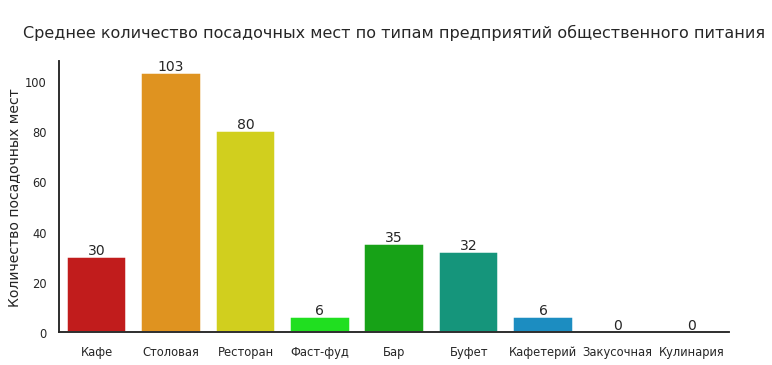

In [70]:
sns.set_style('white')
plt.figure(figsize =(12, 5))

ax = sns.barplot(x='object_type', y='number_median', data = rest_number_mean,
                order = df['object_type'].value_counts().index, palette = 'nipy_spectral_r')                           # cортировка по убыванию
# убираем лишние оси
sns.despine()

plt.title('\nСреднее количество посадочных мест по типам предприятий общественного питания\n', 
          fontdict={'size': 16}, loc='center')
plt.ylabel('Количество посадочных мест', fontdict={'size': 14})
plt.xlabel('', fontdict={'size': 14})

# подписи под графиком
N = 9
ind = np.arange(N)
plt.xticks(ind, ('Кафе', 'Столовая', 'Ресторан', 'Фаст-фуд', 
                 'Бар', 'Буфет', 'Кафетерий', 'Закусочная', 'Кулинария'))

# текст над столбцами
for i, number_median in enumerate(for_sort['number_median']):
    ax.text(i, number_median, round(number_median), horizontalalignment='center', 
                                                   verticalalignment='bottom', fontsize=14)

plt.savefig('{}/object_type_number_mean.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

**ТОП-3 предприятий по количеству посадочных мест - Столовая (103), Ресторан (80), Бар/Буфет/Кафе (30-35, примерно одинаковое количество посадочных мест в среднем)**

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Понравились аргументы в пользу медианы👍</div> <br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
Если бы еще отсортироваться на графике)</div> <br>

## <a id="2.6"></a>**2.6 Информация об улицах местонахождения объектов**

[к содержанию](#0.1)

In [71]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48
1,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35
2,24309,кафе академия,несетевое,кафе,город москва абельмановская улица дом 6,95
3,21894,пиццетория,сетевое,кафе,город москва абрамцевская улица дом 1,40
4,119365,кафе вишневая метель,несетевое,кафе,город москва абрамцевская улица дом 9 корпус 1,50


Выделение названии улицы (ровно как и шоссе, переулка и т.п.) сделаем с помощью регулярных выражений путем очистки строк от остальной информации - номера домов, корпуса, сооружения и т.д. Фразу "город Москва" удалим, оставим наименования поселков и деревень ближайшего подмосковья. Путем простого разделения строки по запятым выделить улицы не получится так как не вся информация записана по шаблону. Удалим ненужную информация через замену на "ничего"

In [72]:
streets = df['address'].to_list()

In [73]:
streets_only = []
for street in streets:  
    start = street.find('город москва ')
    end = street.find('дом ')
    streets_only.append(street[start+13:end-1])

In [74]:
df['street_name'] = streets_only

In [75]:
df['street_name'] = df.street_name.str.replace("(домовладение).*","", regex = True)
df['street_name'] = df.street_name.str.replace("(строение).*","", regex = True)
df['street_name'] = df.street_name.str.replace("(владение).*","", regex = True)
df['street_name'] = df.street_name.str.replace("(корпус).*","", regex = True)

In [76]:
df

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова
1,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина
2,24309,кафе академия,несетевое,кафе,город москва абельмановская улица дом 6,95,абельмановская улица
3,21894,пиццетория,сетевое,кафе,город москва абрамцевская улица дом 1,40,абрамцевская улица
4,119365,кафе вишневая метель,несетевое,кафе,город москва абрамцевская улица дом 9 корпус 1,50,абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,сетевое,кафе,город москва 3-й крутицкий переулок дом 18,50,3-й крутицкий переулок
15362,209264,шоколадница,сетевое,кафе,город москва улица земляной вал дом 33,10,улица земляной вал
15363,209186,шоколадница,сетевое,кафе,город москва улица земляной вал дом 33,20,улица земляной вал
15364,221900,шоколадница,сетевое,кафе,город москва поселение московский киевское шоссе 22-й километр домовладение 4 строение 1,36,поселение московский киевское шоссе 22-й километр


In [77]:
df[df['street_name'] == ''].count()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
street_name    0
dtype: int64

In [78]:
len(df.street_name.unique())

2216

In [79]:
df.street_name.unique().tolist()

['улица егора абакумова',
 'улица талалихина',
 'абельмановская улица',
 'абрамцевская улица',
 'переулок сивцев вражек',
 'авиамоторная улица',
 'улица авиаторов',
 'азовская улица',
 'большая академическая улица',
 'филипповский переулок',
 'алтайская улица',
 'алтуфьевское шоссе',
 'улица амундсена',
 'анадырский проезд',
 'ангарская улица',
 'проспект андропова',
 'улица арбат',
 'улица артамонова',
 'астраханский переулок',
 'аэродромная улица',
 'бабаевская улица',
 'улица ивана бабушкина',
 'байкальская улица',
 'бакинская улица',
 'балаклавский проспект',
 '1-й балтийский переулок',
 'улица барклая',
 'новая басманная улица',
 'бауманская улица',
 'татарская улица',
 'башиловская улица',
 'беговая улица',
 'улица демьяна бедного',
 'белореченская улица',
 'бережковская набережная',
 'улица берзарина',
 'бескудниковский бульвар',
 'улица бестужевых',
 'бибиревская улица',
 'улица маршала бирюзова',
 'бойцовая улица',
 'болотниковская улица',
 'коктебельская улица',
 'ботаническа

In [80]:
# найдем первые 10 улиц по количеству предприятий на каждой,
# и запишем в отдельную таблицу
street_count = df['street_name'].value_counts().head(10).reset_index()
street_count.columns = ['street_name', 'object_count']
street_count

,street_name,object_count
0,проспект мира,203
1,профсоюзная улица,181
2,ленинградский проспект,169
3,пресненская набережная,167
4,варшавское шоссе,155
5,ленинский проспект,147
6,город зеленоград,129
7,проспект вернадского,127
8,кутузовский проспект,114
9,каширское шоссе,103


In [81]:
street_top_10 = street_count.street_name.to_list()       # для подписи в графике
street_top_10

['проспект мира',
 'профсоюзная улица',
 'ленинградский проспект',
 'пресненская набережная',
 'варшавское шоссе',
 'ленинский проспект',
 'город зеленоград ',
 'проспект вернадского',
 'кутузовский проспект',
 'каширское шоссе']

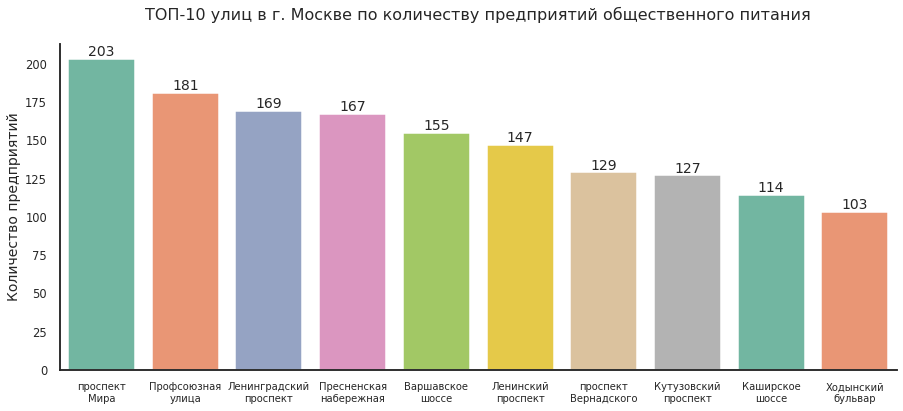

In [82]:
plt.figure(figsize =(15, 6))

ax = sns.barplot(x='street_name', y='object_count', data=street_count, palette = 'Set2')  # cортировка по убыванию

sns.despine()

plt.title('ТОП-10 улиц в г. Москве по количеству предприятий общественного питания\n', 
          fontdict={'size': 16}, loc='center')
plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('', fontdict={'size': 14})

# подписи под графиком
N = 10
ind = np.arange(N)
plt.xticks(ind, ('проспект\nМира', 'Профсоюзная\nулица', 'Ленинградский\nпроспект', 'Пресненская\nнабережная', 
                 'Варшавское\nшоссе', 'Ленинский\nпроспект', 'проспект\nВернадского', 'Кутузовский\nпроспект', 
                 'Каширское\nшоссе', 'Ходынский\nбульвар'), rotation=0, fontsize=10)

# текст над столбцами
for i, object_count in enumerate(street_count['object_count']):
    ax.text(i, object_count, round(object_count), horizontalalignment='center', 
                                                   verticalalignment='bottom', fontsize=14)

plt.savefig('{}/street_count.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

Улицы выделены корректно!

<b>Что можно улучшить</b><br>
При большом кол-ве строк, цикл может выполняться долго, как можно сократить:
<ul>
    <li> обрабатывать только уникальные значения (их как правило меньше)
    <li> использовать векторную обработку - обычно это встроенные методы, например, заменить что-то в столбце <code>df['address'].str.replace(...)</code></ul>
Есть иной способ выделения улиц (качество буде примерно тем же) - <code>df['address'].str.split(', ', expand=True)</code></div> <br>

### **Воспользуемся Гуглом:**

- Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино, Ярославский (ЦАО, СВАО)
- Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево (ЮЗАО)
- Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский (САО)
- Пресненская набережная: Пресненский (ЦАО)
- Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный (ЮАО, ЮЗАО)
- Ленинский проспект: Якиманка, Гагаринский, Донской, Обручевский, Тёплый Стан и Проспект Вернадского (ЦАО, ЮАО, ЮЗАО, ЗАО)
- Проспект Вернадского: Гагаринский, Раменки и Проспект Вернадского (ЮЗАО, ЗАО)
- Кутузовский проспект: Дорогомилово, Фили-Давыдково (ЗАО)
- Каширское шоссе: Нагатино-Садовники и Нагорный (ЮАО)
- Ходынский бульвар: Хорошёвский (САО)

## <a id="2.7"></a>**2.7 Улицы с одним объектом общественного питания**

[к содержанию](#0.1)

In [83]:
street_count = df['street_name'].value_counts().reset_index()
street_count.columns = ['street_name', 'object_count']
len(street_count[street_count['object_count'] == 1])

768

Всего таких улиц 768, создадим отдельную базу по этим улицам и определим в каких округах они находятся

In [84]:
street_count_min = street_count[street_count['object_count'] == 1]
street_count_min.head()

,street_name,object_count
1448,проезд якушкина,1
1449,улица недорубова,1
1450,поселение рязановское поселок остафьево,1
1451,4-й вятский переулок,1
1452,театральный проезд,1


Список всех улиц Москвы и их привязка к районам с сайта МосГаз. (https://noosphere.ru/pubs/714051) База скачана и преобразована под задачу отдельно.

In [85]:
from io import BytesIO
import requests
spreadsheet_id = '1cjcgVLV7G9kq5ircyjGfUDdvimChYk57M3_e05mIDGA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mos_data = pd.read_csv(BytesIO(r.content))
mos_data
#mos_data = pd.read_csv('C:/Users/mxmma/OneDrive/Documents/Яндекс/Проекты Яндекс/8. Рынок заведений общественного питания Москвы/mosgaz-streets.csv')
mos_data.columns = ['street_name', 'area_id', 'adm_area', 'district']
mos_data['street_name'] = mos_data['street_name'].str.lower()
mos_data['street_name'] = mos_data['street_name'].str.replace('ё','е')
mos_data

,street_name,area_id,adm_area,district
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,вознесенский проезд,17,ЦАО,Пресненский район
4394,волков переулок,17,ЦАО,Пресненский район
4395,поварская улица,17,ЦАО,Пресненский район
4396,кудринская площадь,17,ЦАО,Пресненский район


<b>Отличная работа</b><br>
Отличное использование <code>Google Sheets</code> в качестве хранилища</div> <br>

<b>Что можно улучшить</b><br>
А почему эти данные не использовал в случае с топ-10 улиц ?</div> <br>

In [86]:
#street_count_min = street_count_min.merge(moscow_add, how = 'inner', on = 'street_name')
#street_count_min.info()
street_count_min_merged = street_count_min.merge(mos_data, how = 'inner', on = 'street_name')
street_count_min_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   street_name   560 non-null    object
 1   object_count  560 non-null    int64 
 2   area_id       560 non-null    int64 
 3   adm_area      560 non-null    object
 4   district      560 non-null    object
dtypes: int64(2), object(3)
memory usage: 26.2+ KB


In [87]:
street_count_min_merged

,street_name,object_count,area_id,adm_area,district
0,проезд якушкина,1,80,СВАО,Район Отрадное
1,4-й вятский переулок,1,65,САО,Савеловский район
2,3-я северная линия,1,84,СВАО,Район Северный
3,сеченовский переулок,1,20,ЦАО,Район Хамовники
4,улица раевского,1,38,ЗАО,Район Дорогомилово
...,...,...,...,...,...
555,лосевская улица,1,86,СВАО,Ярославский Район
556,ростокинская улица,1,81,СВАО,Район Ростокино
557,1-й сельскохозяйственный проезд,1,81,СВАО,Район Ростокино
558,юрловский проезд,1,80,СВАО,Район Отрадное


В итоге данных немного меньше из-за адресов вне Москвы, не относящихся к какому-либо округу.

### **Определим сколько улиц с одним предприятием общественного питания в каждом округе Москвы.**

In [88]:
street_count_min_area = (
    street_count_min_merged.groupby('adm_area').
                     agg({'object_count': 'sum'}).                        # суммирование улиц с одним заведением
                     sort_values(by='object_count', ascending=False).     # сортировка по убыванию
                     reset_index()
)
street_count_min_area

,adm_area,object_count
0,ЦАО,186
1,ВАО,71
2,СВАО,65
3,САО,55
4,ЮВАО,55
5,ЗАО,41
6,ЮАО,30
7,СЗАО,28
8,ЮЗАО,28
9,Зеленоград,1


### **График количества улиц с одним предприятием общественного питания по каждому округу г. Москвы**

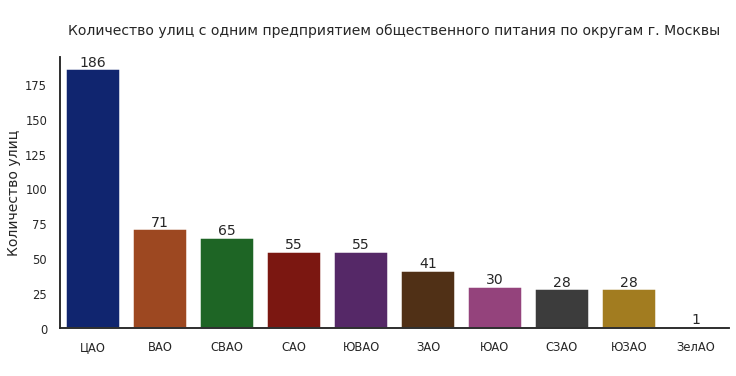

In [89]:
plt.figure(figsize =(12, 5))

ax = sns.barplot(x='adm_area', y='object_count', data=street_count_min_area, palette= 'dark')  

sns.despine()

plt.title('\nКоличество улиц с одним предприятием общественного питания по округам г. Москвы\n', 
          fontdict={'size': 14}, loc='center')
plt.ylabel('Количество улиц', fontdict={'size': 14})
plt.xlabel('', fontdict={'size': 14})

# подписи под графиком
N = 10
ind = np.arange(N)
plt.xticks(ind, ('ЦАО', 'ВАО', 'СВАО', 'САО', 'ЮВАО', 'ЗАО', 'ЮАО', 'СЗАО', 
                 'ЮЗАО', 'ЗелАО\n'), rotation=0)

# текст над столбцами
for i, object_count in enumerate(street_count_min_area['object_count']):
    ax.text(i, object_count, round(object_count), horizontalalignment='center', 
                                                   verticalalignment='bottom', fontsize=14)

plt.savefig('{}/street_count_min_area.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

Выделяются три основные группы по количеству улиц с одним предприятием.

- Больше всего улиц с одним заведением в ЦАО - 186
- Четыре округа где 55-70 улиц - ВАО(71), СВАО(65), САО(55), ЮВАО(55) - восточная часть карты Москвы с Севера на ЮГ
- Четыре округа по 30-40 улиц - ЗАО(41), ЮАО(30), СЗАО(28), ЮЗАО(28) - западная часть карты с Севера на Юг.
- Меньше всего таких улиц в Зеленограде - 1.

In [90]:
street_count_min_dist = (
    street_count_min_merged.groupby('district').
                     agg({'object_count': 'sum'}).                        # суммирование улиц с одним заведением
                     sort_values(by='object_count', ascending=False).     # сортировка по убыванию
                     reset_index()
)
print('ТОП-10 районов с улицами с одним предприятием общественного питания:\n\n',
      street_count_min_dist.head(10))

ТОП-10 районов с улицами с одним предприятием общественного питания:

               district  object_count
0      Таганский район            27
1      Район Хамовники            26
2      Басманный район            25
3       Тверской район            20
4    Пресненский район            19
5   Район Марьина роща            17
6          Район Арбат            17
7      Мещанский район            16
8     Район Сокольники            15
9  Район Замоскворечье            14


In [91]:
print('Всего улиц с 1 объектом общественного питания: {}, что составляет {:.1%} от всего кол-ва улиц с объектами общественного питания'\
      .format(len(street_count_min_merged), (len(street_count_min_dist)/len(street_count))))
print()
print('Районы, в которых находятся улицы с 1 объектом общественного питания:\n')
for area in street_count_min_merged['district'].sort_values().unique():
    print('-', area)

Всего улиц с 1 объектом общественного питания: 560, что составляет 4.5% от всего кол-ва улиц с объектами общественного питания

Районы, в которых находятся улицы с 1 объектом общественного питания:

- Алексеевский район
- Алтуфьевский район
- Бабушкинский район
- Басманный район
- Бескудниковский Район
- Бутырский район
- Войковский Район
- Головинский район
- Даниловский район
- Дмитровский район
- Донской район
- Красносельский район
- Лосиноостровский район
- Мещанский район
- Можайский Район
- Молжаниновский район
- Нагорный район
- Нижегородский район
- Обручевский район
- Останкинский район
- Пресненский район
- Район Арбат
- Район Аэропорт
- Район Беговой
- Район Бирюлево Восточное
- Район Богородское
- Район Внуково
- Район Восточное Измайлово
- Район Восточный
- Район Выхино-Жулебино
- Район Гагаринский
- Район Гольяново
- Район Дорогомилово
- Район Замоскворечье
- Район Западное Дегунино
- Район Зюзино
- Район Ивановское
- Район Измайлово
- Район Коньково
- Район Коптево
- Ра

## <a id="2.8"></a>**2.8 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания**

[к содержанию](#0.1)

In [92]:
df.query('street_name == @street_top_10').head()

,id,object_name,chain,object_type,address,number,street_name
151,155973,кафе андерсон,сетевое,кафе,город москва варшавское шоссе дом 2,150,варшавское шоссе
152,23618,кафе subway,сетевое,кафе,город москва варшавское шоссе дом 7 корпус 1,36,варшавское шоссе
153,155852,кафе ламаджо,несетевое,кафе,город москва варшавское шоссе дом 29,30,варшавское шоссе
154,152556,шаурма в пите,несетевое,фаст-фуд,город москва варшавское шоссе дом 72 корпус 2,0,варшавское шоссе
155,120658,выпечка,несетевое,кафетерий,город москва варшавское шоссе дом 100,2,варшавское шоссе


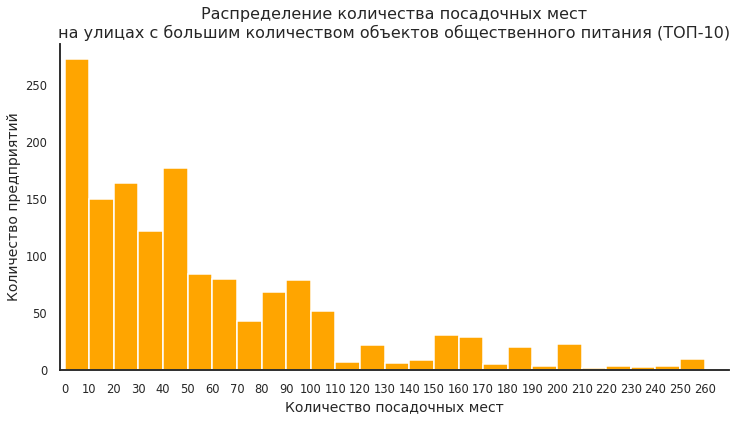

In [93]:
plt.figure(figsize=(12, 6))

# разметка оси Х по в соответствии с корзинами распределения
plt.xlim(-2,270)
bins = pd.Series(np.arange(0,270,10))  

sns.distplot(df.query('street_name == @street_top_10').number, bins=bins,
             kde=False, hist_kws = {'color':'orange', 'alpha':1.0})

plt.title('Распределение количества посадочных мест\nна улицах с большим количеством\
 объектов общественного питания (ТОП-10)', 
          fontdict={'size': 16}, loc='center')

plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('Количество посадочных мест\n', fontdict={'size': 14})
plt.xticks(bins)

sns.despine()
plt.savefig('{}/street_top10.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

**Для наиболее загруженных улиц (по количеству точек питания) характерен формат заведений с количеством мест от 0 до 50. Если не рассматривать местоположение на общих фудкортах то большинство предприятий это 10-50 посадочых мест. Вероятно сильно зависит от района Москвы распределение по количеству мест.**

### Рассмотрим Центральный округ - "Пресненская набережная"

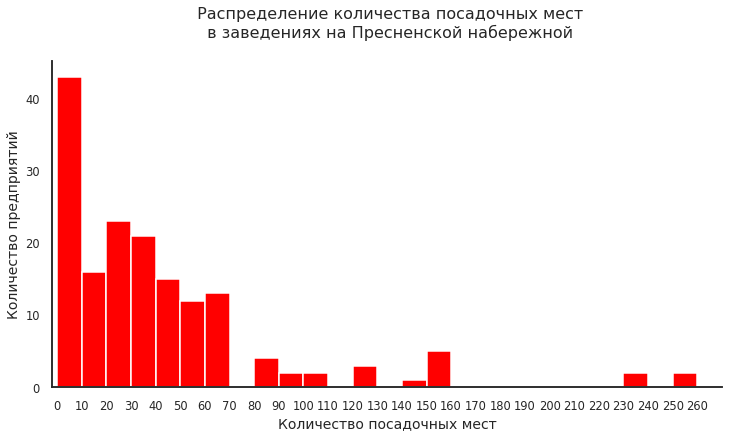

In [94]:
plt.figure(figsize=(12, 6))

# разметка оси Х по в соответствии с корзинами распределения
plt.xlim(-2,270)
bins = pd.Series(np.arange(0,270,10))  

sns.distplot(df.query('street_name == "пресненская набережная"').number, bins=bins,
             kde=False, hist_kws = {'color':'red', 'alpha':1.0})

plt.title(' Распределение количества посадочных мест\n в заведениях на Пресненской набережной\n', 
          fontdict={'size': 16}, loc='center')

plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('Количество посадочных мест', fontdict={'size': 14})
plt.xticks(bins)

sns.despine()
plt.savefig('{}/street_presnya.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

### Рассмотрим Северо-Восточный округ - "Проспект Мира"

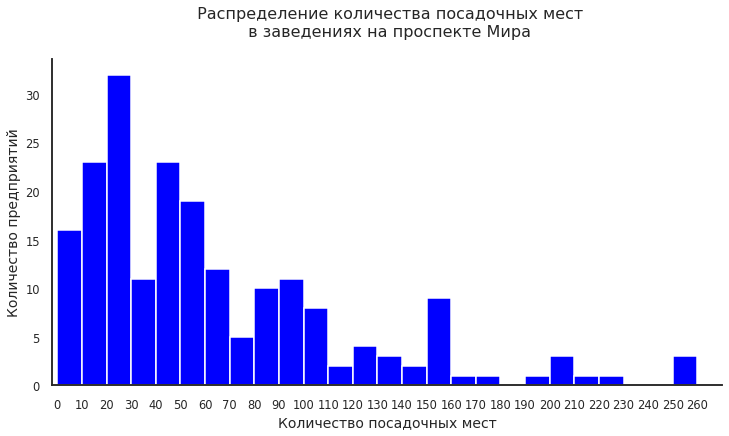

In [95]:
plt.figure(figsize=(12, 6))

# разметка оси Х по в соответствии с корзинами распределения
plt.xlim(-2,270)
bins = pd.Series(np.arange(0,270,10))  

sns.distplot(df.query('street_name == "проспект мира"').number, bins=bins,
             kde=False, hist_kws = {'color':'blue', 'alpha':1.0})

plt.title(' Распределение количества посадочных мест\n в заведениях на проспекте Мира\n', 
          fontdict={'size': 16}, loc='center')

plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('Количество посадочных мест', fontdict={'size': 14})
plt.xticks(bins)

sns.despine()
plt.savefig('{}/street_pospect.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

### Рассмотрим Северо-Восточный округ - "Профсоюзная улица"

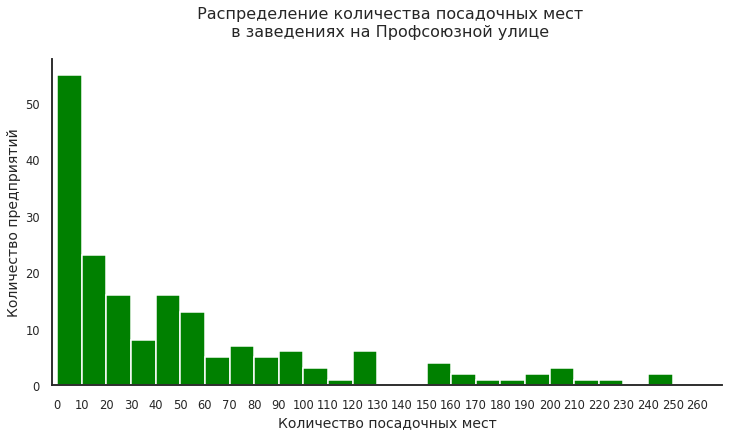

In [96]:
plt.figure(figsize=(12, 6))

# разметка оси Х по в соответствии с корзинами распределения
plt.xlim(-2,270)
bins = pd.Series(np.arange(0,270,10))  

sns.distplot(df.query('street_name == "профсоюзная улица"').number, bins=bins,
             kde=False, hist_kws = {'color':'green', 'alpha':1.0})

plt.title(' Распределение количества посадочных мест\n в заведениях на Профсоюзной улице\n', 
          fontdict={'size': 16}, loc='center')

plt.ylabel('Количество предприятий', fontdict={'size': 14})
plt.xlabel('Количество посадочных мест', fontdict={'size': 14})
plt.xticks(bins)

sns.despine()
plt.savefig('{}/street_prof.png'.format(output_dir), dpi=200, bbox_inches='tight') # сохраняем график в файл для презентации;

**Для улиц из ТОП-10 по количеству точек питания характерное количество посадочных мест зависит от района города. Общий график подтвердается точечными измерениями по трем самым загруженным улицам. Основная масса предприятий не имеют своих зон для рассадки гостей, на проспекте Мира больше заведений где от 10 до 50 мест.**

### Итоги анализа данных

Состав базы предприятий общественного питания

- Больше всего "Кафе" - 6068 шт.
- Следующая три типа, наиболее массовый сегмент, - "Столовая"(2584), "Ресторан"(2281), "Фаст-фуд"(1897)
- Последние три, примерно равными долями, - "Кафетерий"(395), "Закусочная"(348), "Кулинария"(273).

**В основном сетевыми предприятиями являются кафе, ресторан, предприятия быстрого питания.**

**Характерное количество посадочных мест для ТОП-3 типов сетевых предприятий**

- Для кафе наиболее типичным является 20-50 посадочных мест.
- "Фаст-фуд" в большинстве своем не имеет своих посадочных мест, так как это не предусмотрено форматом заведения или они располагаются в ТЦ и т.п. местах.
- Для ресторанов характерно 50-90 посадочных мест.

**Среднее количество посадочных мест объектов общественного питания - ТОП-3.**

1. Столовая (100 мест),
2. Ресторан (80 мест),
3. Бар/Буфет/Кафе (30-35 мест, примерно одинаковое количество посадочных мест, в среднем)

**ТОП-10 улиц в г. Москве по количество предприятий общественного питания.**

1. Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино, Ярославский (ЦАО, СВАО)
2. Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево (ЮЗАО)
3. Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский (САО)
4. Пресненская набережная: Пресненский (ЦАО)
5. Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный (ЮАО, ЮЗАО)
6. Ленинский проспект: Якиманка, Гагаринский, Донской, Обручевский, Тёплый Стан и Проспект Вернадского (ЦАО, ЮАО, ЮЗАО, ЗАО)
7. Проспект Вернадского: Гагаринский, Раменки и Проспект Вернадского (ЮЗАО, ЗАО)
8. Кутузовский проспект: Дорогомилово, Фили-Давыдково (ЗАО)
9. Каширское шоссе: Нагатино-Садовники и Нагорный (ЮАО)
10. Ходынский бульвар: Хорошёвский (САО)

**Улицы с одним объектом.**

Всего таких улиц 768. Список всех улиц Москвы и их привязка к районам с сайта МосГаз. (https://noosphere.ru/pubs/714051) Базу подготовили под задачу отдельно.

**Выделяются три основные группы по количеству улиц с одним предприятием.**

- Больше всего улиц с одним заведением в ЦАО - 186
- Четыре округа где 55-70 улиц - ВАО(71), СВАО(65), САО(55), ЮВАО(55) - восточная часть карты Москвы с Севера на ЮГ
- Четыре округа по 30-40 улиц - ЗАО(41), ЮАО(30), СЗАО(28), ЮЗАО(28) - западная часть карты с Севера на Юг.
- Меньше всего таких улиц в Зеленограде - 1.


## Рекомендации по развитию проекта

Отличительная особенность формата заведения – кафе, где посетителей обслуживают роботы официанты. Исходя из этого, рекомендации по запуску и развитию проекта могут быть такими:

- Формат "Кафе" наиболее точно подходит под идею.
- Местоположение - Центральный или Восточные округа Москвы
- Улицы с малым количеством предприятий общественного питания (1+)
- Количество посадочных мест - 20-40
- Сетевая структура кафе

**Преимущества:**

1. **Меньше конкуренция:**
    * В центральном районе больше всего улиц с одним заведением. Далее по списку Восточные округа Москвы.
    * По Восточным округам в общем меньше количество заведений, чем в других округах.
    
    
2. **Тип объекта и количество мест:**
    * Кафе, как отдельное помещение, предполагает свою ограниченную территорию для передвижения роботов. Размещение в ТЦ или фудкортах сложно организовать с технической точки зрения - нет "своей" территории для работы с гостями, соответственно нет необходимости в официантах.
    * Количество мест 20-50 - оптимальное для постоянного трафика, следовательно, и работы официантов. Если мест 0-20, то предполагается работа заведения с потоком гостей берущих товар "на вынос", такой формат похож на вендинговые автоматы для продажи еды.
    
    
3. **Сетевая структура предприятия приносит больше прибыли за счет централизованности закупок и масштабируемости бизнес решений.**

**Недостатки:**

1. **Стоимость:**
    * Отдельное помещение - дорогостоящее решение особенно в Центральном округе.
    * Сетевая структура требует больших начальных затрат.
    
    
2. **Ограничения по количеству мест:**
    * Количество мест 0-10 - вариант работы на фудкортах в ТЦ и т.п. более дешевый вариант запуска проекта. Но несет в себе риски материальные, а именно на такой "неограниченной" территории нельзя быть уверенным в антивандальных свойствах робота. Во всяком случае не на начальном этапе развитии проекта. Пока не будет отработана система работы в ограниченном пространстве - риски велики.
    
    
3. **Местоположение**
    * Требуется тщательный анализ местоположения (по улицам и районам), возможно есть какие-то скрытые причины низкой активности на улицах с одним предприятием.
    * Высокая конкуренция на более оживленных улицах потребует бОльшего срока возврата инвестиций.

**Пояснения по части отсутствия посадочных мест.** *Для сетевых проектов фудкорты и т.п. хорошая возможность старта, да и для несетевого проекта тоже. Это вероятно дешевле (зависит от места), возможностей выбрать местоположение больше. Текущие расходы меньше. Есть сетевые проекты которые совмещают и такой тип объекта, и классическое кафе (ресторан) в разных районах Москвы. Не берем в расчет крупных игроков, но например хинкальная "Вай Мэ!".
Из того что нам изестно, о заданном проекте, размещение на фудкорте будет сравнимо с автоматом по выдаче еды, в лучшем случае, в худшем с недолгим и опасным развлечением с самоходными игрушками.*

# <a id="3"></a>Шаг №3. Подготовка презентации
[к содержанию](#0.1)

Ссылка на презентацию: https://1drv.ms/b/s!AkOle23cUbde8ksgoTsI3D19GbkI?e=tqVghP

<hr style="border: 2px solid green;" />

## Общий комментарий
Спасибо за проделанную работу🤝

Максим, работа выполнена очень хорошо - ты детально изучил рынок общественного питания!

Есть несколько  доработок:
- подробнее изучить кол-во заведений vs кол-во мест

**Презентация**

Выполнена шикарно, оформление 🔥 Законы робототехники👍

Для полноты картины осталось добавить указание на источник данных:
- источники данных 

Александр Богачев в книге _Графики, которые убеждают всех_ так описывает указание источников:
```
Всегда указывайте источники ваших данных. Без них ценность и доверие к вашему графику резко снижается. Когда читатель не может проверить данные, ему сложно вам поверить.
Если вы сами провели часть расчетов, то вполне можете написать: «Данные Росстата + собственные расчеты автора».
После того, как вы указали источник, отвечайте за данные. Кто-то действительно может пойти и проверить.
```

Пример можно подсмотреть <a href="https://docs.google.com/presentation/d/1Y_zrOZQp6O-1Jzx0cWZFdYOGxKzpkFDQkXD6r8WBYQ8/edit#slide=id.gd500d5eb9a_0_0">тут</a> 

Исправляй и отправляй на проверку🛠